In [1]:
import torch
from transformers import MCTCForCTC, MCTCProcessor, MCTCConfig
config = MCTCConfig()
model = MCTCForCTC(config)
model.load_state_dict(torch.load("./ported_pytorch_model.bin"))
model = model.eval()

In [2]:
import arrayfire as af
input_features = af.array.read_array("OUTPUT.arr", key="model_input").to_ndarray()
ctc_head_output = af.array.read_array("OUTPUT.arr", key="ctc_head_output").to_ndarray()

input_features = torch.Tensor(input_features).unsqueeze(0) # batch
ctc_head_output = torch.Tensor(ctc_head_output)

def valueprint(k, name=None):
    print(name, k.shape, k.sum(), k.std())

valueprint(input_features)
valueprint(ctc_head_output)

None torch.Size([1, 961, 80]) tensor(-0.0034) tensor(1.0000)
None torch.Size([8065, 321]) tensor(8723289.) tensor(10.6297)


In [ ]:
my_logits = model(input_features).logits[0]
valueprint(my_logits)

In [4]:
valueprint(my_logits)

None torch.Size([321, 8065]) tensor(8723279., grad_fn=<SumBackward0>) tensor(10.6297, grad_fn=<StdBackward0>)


None torch.Size([8065, 321]) tensor(10.3278) tensor(0.0003)


<Figure size 432x720 with 0 Axes>

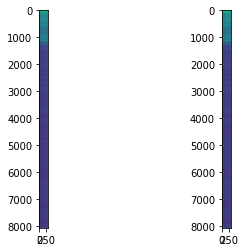

In [6]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(6, 10))


fig, axs = plt.subplots(1, 2)
# fig.suptitle('Vertically stacked subplots')
# axs[0].plot(x, y)
# axs[1].plot(x, -y)

# modified = manual_rel.transpose(0,1).reshape([2159, 321, 4])
mine = my_logits.transpose(0,1).detach().numpy()
axs[0].imshow(ctc_head_output)
axs[1].imshow(mine)
# axs[2].imshow(MHAttention_matmulPos)
valueprint(ctc_head_output - mine)

In [15]:
ctc_head_output[0][:10]

tensor([40.2842, 41.3599, 45.9419, 46.2969, 46.1534, 44.6336, 40.6253, 40.6394,
        50.8049, 49.2264])

In [16]:
mine[0][:10]

array([40.284042, 41.361042, 45.941486, 46.29699 , 46.153664, 44.633995,
       40.625225, 40.639484, 50.804905, 49.226124], dtype=float32)

In [7]:
from transformers import MCTCTokenizer, MCTCFeatureExtractor

feature_extractor = MCTCFeatureExtractor.from_pretrained("cwkeam/mctc-large")

tokenizer = MCTCTokenizer.from_pretrained("cwkeam/mctc-large")


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [34]:
import numpy as np
pred_ids = torch.argmax(torch.Tensor(ctc_head_output).transpose(0,1), axis=-1)
print("pred_ids", pred_ids[:10])
# outputs = tokenizer.decode(pred_ids, output_word_offsets=True)[0]
for idval in pred_ids:
    idval += 1
    
    if idval == 8065:
        continue
    print(idval)
    print(tokenizer.convert_ids_to_tokens(idval.unsqueeze(0)))



pred_ids tensor([  81, 8064, 8064, 8064, 8064, 8064,   29,   58, 8064, 8064])
tensor(82)
['|']
tensor(30)
['H']
tensor(59)
['e']
tensor(82)
['|']
tensor(67)
['m']
tensor(75)
['u']
tensor(73)
['s']
tensor(74)
['t']
tensor(82)
['|']
tensor(62)
['h']
tensor(55)
['a']
tensor(76)
['v']
tensor(59)
['e']
tensor(82)
['|']
tensor(82)
['|']
tensor(72)
['r']
tensor(59)
['e']
tensor(59)
['e']
tensor(55)
['a']
tensor(55)
['a']
tensor(66)
['l']
tensor(66)
['l']
tensor(63)
['i']
tensor(80)
['z']
tensor(59)
['e']
tensor(58)
['d']
tensor(82)
['|']
tensor(82)
['|']
tensor(31)
['I']
tensor(82)
['|']
tensor(77)
['w']
tensor(55)
['a']
tensor(73)
['s']
tensor(73)
['s']
tensor(82)
['|']
tensor(82)
['|']
tensor(55)
['a']
tensor(82)
['|']
tensor(73)
['s']
tensor(74)
['t']
tensor(72)
['r']
tensor(55)
['a']
tensor(68)
['n']
tensor(68)
['n']
tensor(61)
['g']
tensor(59)
['e']
tensor(72)
['r']
tensor(72)
['r']
tensor(82)
['|']
tensor(55)
['a']
tensor(68)
['n']
tensor(58)
['d']
tensor(82)
['|']
tensor(77)
['w']
tens

In [38]:
model.save_pretrained("./final_pretrained")

In [13]:
import json

k = json.load(open("./../../mctc-large/vocab.json", "r"))

In [14]:
new_k = {}
for key, value in k.items():
    if value == 0:
        continue
    new_k[key] = value - 1

new_k["<pad>"] = 8064

json.dump(new_k, open("./../../mctc-large/vocab.json", "w"))

In [15]:
import torch
from transformers import MCTCForCTC, MCTCProcessor, MCTCConfig
from transformers import MCTCTokenizer, MCTCFeatureExtractor

model = MCTCForCTC.from_pretrained("./../../mctc-large")
feature_extractor = MCTCFeatureExtractor.from_pretrained("./../../mctc-large")
tokenizer = MCTCTokenizer.from_pretrained("./../../mctc-large")


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [16]:
import arrayfire as af
input_features = af.array.read_array("OUTPUT.arr", key="model_input").to_ndarray()
ctc_head_output = af.array.read_array("OUTPUT.arr", key="ctc_head_output").to_ndarray()

input_features = torch.Tensor(input_features).unsqueeze(0) # batch
ctc_head_output = torch.Tensor(ctc_head_output)

def valueprint(k, name=None):
    print(name, k.shape, k.sum(), k.std())

valueprint(input_features)
valueprint(ctc_head_output)

None torch.Size([1, 961, 80]) tensor(-0.0034) tensor(1.0000)
None torch.Size([8065, 321]) tensor(8723289.) tensor(10.6297)


In [ ]:
my_logits = model(input_features).logits[0]


In [18]:
valueprint(my_logits)

None torch.Size([321, 8065]) tensor(8723279., grad_fn=<SumBackward0>) tensor(10.6297, grad_fn=<StdBackward0>)


In [26]:
pred_ids = torch.argmax(my_logits, axis=-1)

pad_token = tokenizer.convert_tokens_to_ids(["<pad>"])[0]

pred_ids = torch.stack([token for token in pred_ids if token != pad_token])

print(tokenizer.convert_ids_to_tokens(pred_ids))



['|', 'H', 'e', '|', 'm', 'u', 's', 't', '|', 'h', 'a', 'v', 'e', '|', '|', 'r', 'e', 'e', 'a', 'a', 'l', 'l', 'i', 'z', 'e', 'd', '|', '|', 'I', '|', 'w', 'a', 's', 's', '|', '|', 'a', '|', 's', 't', 'r', 'a', 'n', 'n', 'g', 'e', 'r', 'r', '|', 'a', 'n', 'd', '|', 'w', 'i', 's', 's', 'h', 'e', 'd', '|', 'y', 'o', 'u', 'u', '|', 't', 'i', 'n', 'd', 'e', 'r', '|', '|', 'h', 'i', 's', '|', '|', 'h', 'o', 's', 's', 'p', 'i', 't', 'a', 'l', 'l', 'i', 't', 't', 'y', '|', 't', 'o', '|', 'm', 'e', ';', '|', 'I', '|', 'a', 'c', 'c', 'e', 'p', 't', 't', 'e', 'd', '|', '|', 'i', 't', '|', '|', 'g', 'r', 'a', 'a', 'a', 't', 'e', 'f', 'u', 'l', 'l', 'l', 'y', ',', '|', 'I', '|', 'c', 'l', 'l', 'a', 's', 'p', '|', 'h', 'i', 's', '|', 'h', 'a', 'n', 'd', '|', 'h', 'e', '|', 'p', 'r', 'r', 'e', 's', 's', 'e', 'd', '|', 'm', 'i', 'n', 'd', '.', '|']
